# Execícios RPAD
## DUPLA: Raul Aquino e Paulo Marvin
### Knn - questão 2

## Importações básicas.

In [69]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import torch 
import numpy as np

## Método para gerar dados no intervalo de [-1,1].

In [70]:
import torch.distributions.uniform as dist
def generate_set(n_dados):
    dados = dist.Uniform(-1*torch.ones(n_dados),torch.ones(n_dados))
    dados_sample = dados.sample()
    return dados_sample

## Gerando os três conjuntos de dados com N = 4, N = 10 e N = 100.

In [71]:
dados_treinamento_4 = generate_set(4)
dados_treinamento_10 = generate_set(10)
dados_treinamento_100 = generate_set(100)
print(dados_treinamento_4)
print()
print(dados_treinamento_10)
print()
print(dados_treinamento_100)

tensor([ 0.8012, -0.7205,  0.4793, -0.2211])

tensor([-0.7492, -0.4114,  0.9768,  0.1084, -0.2418,  0.0849, -0.9135, -0.3008,
         0.5035,  0.9239])

tensor([ 4.7293e-02, -5.2921e-01,  6.1387e-01, -4.7042e-01, -7.9665e-01,
         8.0620e-01,  6.8839e-01, -3.3963e-01,  9.6567e-01,  6.2191e-01,
        -4.7257e-01,  5.1808e-01,  1.2354e-01, -8.4537e-01,  9.1165e-01,
        -5.3115e-01,  4.7378e-01,  3.5998e-01, -6.9944e-01, -1.9549e-01,
         2.3238e-01,  7.5333e-01,  6.5345e-01,  5.9322e-01, -6.4208e-01,
         3.8891e-01,  6.3741e-01, -2.7148e-01, -8.8171e-01,  6.9731e-01,
         4.0794e-01, -9.4219e-01, -7.7402e-01, -2.9547e-01,  2.5635e-01,
        -3.7922e-01,  3.7887e-01, -5.0288e-01,  1.0201e-01, -3.3717e-01,
         1.0785e-01, -5.2231e-01,  9.9668e-01, -6.0163e-01, -9.6442e-01,
         3.8773e-01, -5.5626e-01, -6.3666e-01,  8.7410e-01, -4.6751e-01,
         1.9183e-01,  7.2955e-01,  7.9371e-01,  1.0850e-01, -1.8004e-01,
        -6.1112e-01,  3.5615e-01, -8.3664e-

## Função para gerar as amostras a partir da função:


\begin{align}
\dot{f(x)} & = 2x^2sin(15x) \quad com \qquad x\in [-1,1]
\end{align}

In [72]:
def generate_dataset(joint):
    classes = 2*torch.pow(joint,2)*torch.sin(15*joint)
    return classes

## Gerando amostrar de N = 4.

In [73]:
classesKnn4 = generate_dataset(dados_treinamento_4)
print(classesKnn4)

tensor([-0.6700,  1.0201,  0.3619,  0.0170])


## Gerando amostrar de N = 10.

In [74]:
classesKnn10 = generate_dataset(dados_treinamento_10)
print(classesKnn10)

tensor([ 1.0897,  0.0378,  1.6608,  0.0235,  0.0545,  0.0138, -1.5135,  0.1774,
         0.4841,  1.6413])


## Gerando amostrar de N = 100.

In [75]:
classesKnn100 = generate_dataset(dados_treinamento_100)
print(classesKnn100)

tensor([ 2.9138e-03, -5.5814e-01,  1.6204e-01, -3.0912e-01,  7.3401e-01,
        -5.9265e-01, -7.4303e-01,  2.1406e-01,  1.7533e+00,  7.4259e-02,
        -3.2205e-01,  5.3497e-01,  2.9315e-02, -1.6282e-01,  1.4877e+00,
        -5.6063e-01,  3.2933e-01, -2.0033e-01,  8.5675e-01, -1.5880e-02,
        -3.6439e-02, -1.0828e+00, -3.1442e-01,  3.5367e-01,  1.6904e-01,
        -1.3144e-01, -1.1041e-01,  1.1821e-01, -9.5233e-01, -8.3612e-01,
        -5.4367e-02, -1.7754e+00,  9.7887e-01,  1.6779e-01, -8.5028e-02,
         1.6119e-01, -1.6212e-01, -4.8156e-01,  2.0794e-02,  2.1396e-01,
         2.3239e-02, -5.4552e-01,  1.3656e+00, -2.8216e-01, -1.7604e+00,
        -1.3543e-01, -5.4605e-01,  1.0113e-01,  7.9241e-01, -2.9131e-01,
         1.9214e-02, -1.0630e+00, -7.7320e-01,  2.3506e-02, -2.7669e-02,
        -1.9056e-01, -2.0500e-01,  2.3375e-02,  1.8007e-01, -3.4000e-02,
        -5.7745e-03, -9.9240e-01, -1.7779e-01,  6.3793e-05,  1.6771e+00,
        -6.9710e-01, -8.6768e-01,  7.0216e-01,  1.1

## Importando o KNN Regressor do Sklearning. Usando K = 1.

### Fazendo a utilização dos dados de treinamento4 e o classesKnn4 para treinamento.

In [76]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 1)
knn.fit(dados_treinamento_4.view(-1,1),classesKnn4.view(-1,1))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

## Criando dados de teste.

In [77]:
set_test = generate_set(1000)

## Plotando predições para K = 1 e utilizando classesKnn4.

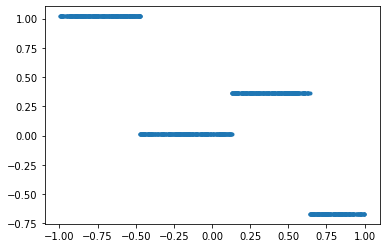

In [78]:
predicts = knn.predict(set_test.view(-1,1))
plt.plot(set_test,predicts, '.')

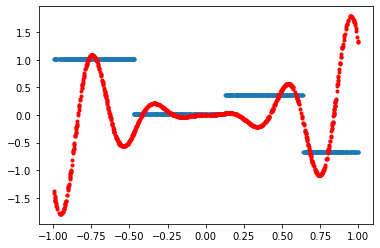

In [79]:
plt.plot(set_test,predicts, '.')
plt.plot(set_test, generate_dataset(set_test),'.', c = 'red')

## Calculando o erro quadrático médio, representado por:

\begin{equation*}
\mathcal{L} =\frac{1}{N}\sum_{k=1}^{N} (y_n-\hat{y}_n)^2
\end{equation*}

In [80]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(predicts,generate_dataset(set_test))
print(error)

0.9255831


## Importando o KNN Regressor do Sklearning. Usando K = 3.

### Fazendo a utilização dos dados de treinamento10 e o classesKnn10 para treinamento.

In [81]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(dados_treinamento_10.view(-1,1),classesKnn10.view(-1,1))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

## Plotando predições para K = 3 e utilizando classesKnn10.

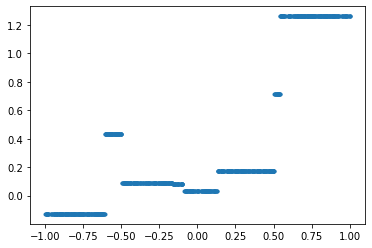

In [82]:
predicts = knn.predict(set_test.view(-1,1))
plt.plot(set_test,predicts, '.')

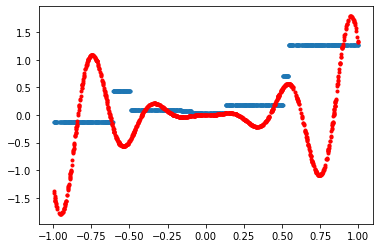

In [83]:
plt.plot(set_test,predicts, '.')
plt.plot(set_test, generate_dataset(set_test),'.', c = 'red')

## Calculando o erro quadrático médio, representado por:

\begin{equation*}
\mathcal{L} =\frac{1}{N}\sum_{k=1}^{N} (y_n-\hat{y}_n)^2
\end{equation*}

In [84]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(predicts,generate_dataset(set_test))
print(error)

0.78980935


## Importando o KNN Regressor do Sklearning. Usando K = 5.

### Fazendo a utilização dos dados de treinamento100 e o classesKnn100 para treinamento.

In [85]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(dados_treinamento_100.view(-1,1),classesKnn100.view(-1,1))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

## Plotando predições para K = 5 e utilizando classesKnn100.

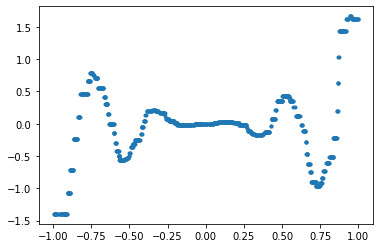

In [86]:
predicts = knn.predict(set_test.view(-1,1))
plt.plot(set_test,predicts, '.')

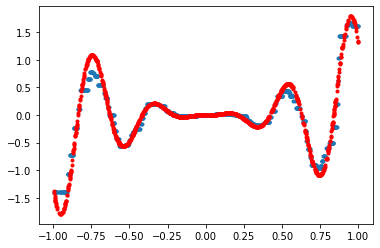

In [87]:
plt.plot(set_test,predicts, '.')
plt.plot(set_test, generate_dataset(set_test),'.', c = 'red')

## Calculando o erro quadrático médio, representado por:

\begin{equation*}
\mathcal{L} =\frac{1}{N}\sum_{k=1}^{N} (y_n-\hat{y}_n)^2
\end{equation*}

In [88]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(predicts,generate_dataset(set_test))
print(error)

0.022630164
